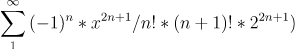

#13.B.a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def n_term(x,n):
  return ( np.math.pow(-1,n)*np.math.pow(x,2*n+1) / ( (np.math.factorial(n)) * (np.math.factorial(n+1)) * (np.math.pow(2,2*n+1)) ))

In [ ]:
err_expected = np.float64(1e-6)

In [ ]:
def summation(x = np.float64(10.1051), n = 2, p = 0):
  x = x*(1-p)
  y = n_term(x,n)
  err = -n_term(x,n+1)
  i = 0
  while(err > err_expected):
    print('n:',n,'  --- y:',y,'  --- error:',err)
    n +=1
    y += n_term(x,n)
    err = np.absolute(n_term(x,n+1))
  return y,err,x,n

In [ ]:
y,err,x,n = summation()
print('Y = ',y,' ---- Error = ',err,' ---- X = ',x)
print('Terminos sumados: ',n-2,' desde el termino n = 2 hasta n = ',n)

n: 2   --- y: 274.39225820101973   --- error: 583.7297768014275
n: 3   --- y: -309.3375186004078   --- error: 745.0803194491401
n: 4   --- y: 435.7428008487323   --- error: 634.0201745087962
n: 5   --- y: -198.27737366006392   --- error: 385.3674479219342
n: 6   --- y: 187.09007426187026   --- error: 175.6743033053962
n: 7   --- y: 11.415770956474063   --- error: 62.28693825068964
n: 8   --- y: 73.70270920716371   --- error: 17.66752497615194
n: 9   --- y: 56.03518423101177   --- error: 4.100192706301426
n: 10   --- y: 60.1353769373132   --- error: 0.7929605425538334
n: 11   --- y: 59.34241639475936   --- error: 0.12976220571460603
n: 12   --- y: 59.47217860047397   --- error: 0.018201118245184958
n: 13   --- y: 59.45397748222878   --- error: 0.002212585267623836
n: 14   --- y: 59.4561900674964   --- error: 0.00023534773045200095
n: 15   --- y: 59.45595471976595   --- error: 2.2088302966906485e-05
n: 16   --- y: 59.45597680806892   --- error: 1.8427319421099195e-06
Y =  59.455974965336

#13.B.b

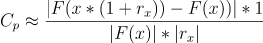


In [ ]:
def get_cp(n, r,x = np.float64(10.1051)):
  sum = 0
  xr = x*(1-r)
  y = 0
  yr = 0
  i=2
  while(i < n+2):
    yr = n_term(xr,i)
    y=n_term(x,i)
    i +=1
  return ( np.absolute(yr-y)/np.absolute(y*r) )

In [ ]:
steps = 15
cp = []
r = [-1e-10,-1e-9,-1e-8,-1e-7,-1e-6,-1e-5,-1e-4,-1e-3,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
df = pd.DataFrame(columns=[''])
for i in r:
  cp += [get_cp(steps,i)]


In [ ]:
df = pd.DataFrame(columns=['xr','cp'])
df.xr = r
df.cp = cp

In [ ]:
exponents = [-10,-9,-8,-7,-6,-5,-4,-3,3,4,5,6,7,8,9,10]

In [ ]:
df = df.assign(exp=exponents)

In [ ]:
df.cp.min()

32.47741531623446

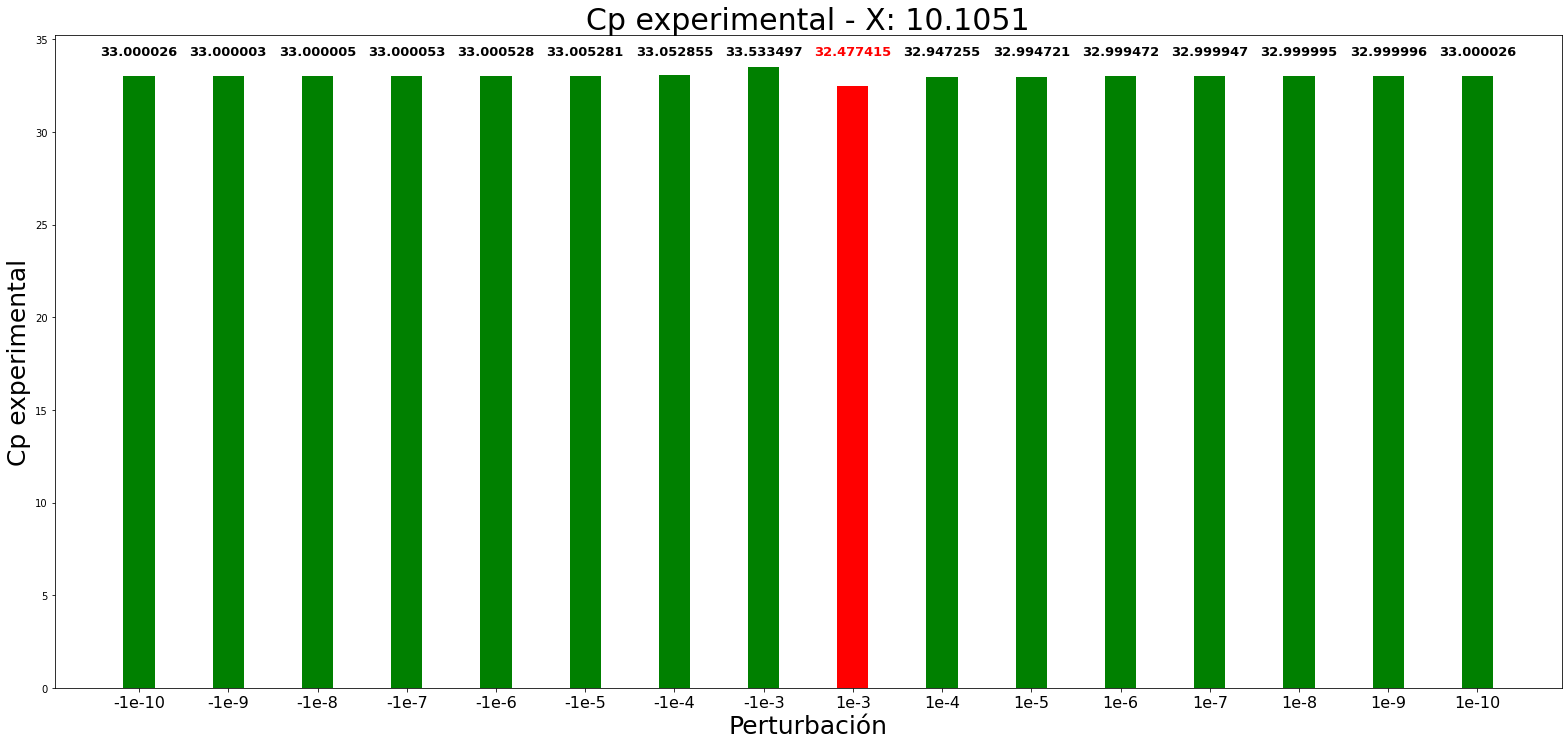

In [ ]:
fig,ax = plt.subplots(figsize=(27,12));
width = 0.35 
bar_plot = ax.bar(np.arange(0,16),df.cp,width,color='g')
labels = np.arange(0,16)
ax.set_ylabel('Cp experimental',fontdict=dict(fontsize=25))
ax.set_xlabel('Perturbación',fontdict=dict(fontsize=25))
ax.set_xticks(labels)
ax.set_xticklabels(('-1e-10', '-1e-9', '-1e-8', '-1e-7','-1e-6', '-1e-5', '-1e-4', '-1e-3', '1e-3', '1e-4', '1e-5', '1e-6','1e-7', '1e-8', '1e-9', '1e-10'),fontdict=dict(fontsize=16))
ax.set_title('Cp experimental - X: 10.1051',loc='center',fontdict=dict(fontsize=30))
for bar in bar_plot:
  height = bar.get_height()
  
  c = 'k'
  if(height == 32.47741531623446):
    c='r'
    bar.set_facecolor(c)
  ax.text(bar.get_x() + bar.get_width()/2,34,'%f'%float(height),ha='center',va='bottom',fontdict=dict(fontsize=13,fontweight=900),color=c)


plt.show()
